In [1]:
import cv2

In [7]:
from PIL import Image
import numpy as np

image = Image.open("./prescript.jpeg")
image_data = np.asarray(image)

f = open("demo.txt", "a")
for i in range(len(image_data)):
    for j in range(len(image_data[0])):
        #print(image_data[i][j])  # this row prints an array of RGB color for each pixel in the image
        f.write(str(image_data[i][j]))
    f.write("\n")   
f.close()

In [ ]:
import cv2
import pytesseract

#pytesseract.pytesseract.tesseract_cmd =  "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

img = cv2.imread("./prescript.jpeg")

print(pytesseract.image_to_string(img, lang="chi_tra"))
print(pytesseract.image_to_string(img, lang="chi_tra+eng"))
print(pytesseract.image_to_string(img))

hImg,wImg,_ = img.shape

#1格1格的字 pytesseract.image_to_boxes
'''
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split()
    #print(b)
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),3)
    cv2.putText(img,b[0],(w,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
'''
    
# 1個單字
boxes = pytesseract.image_to_data(img)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        #print(b)
        if len(b) == 12:
            x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),3)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)

# 只選擇數字
'''
cong = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_data(img,config=cong)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        #print(b)
        if len(b) == 12:
            x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),3)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
'''

cv2.imshow('Result',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread("./prescript.jpeg")
img.shape

(385, 621, 3)

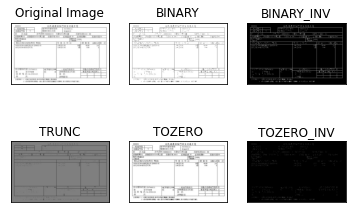

In [12]:
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./prescript.jpeg")
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()